# Intro to Python Midterm: NBA Game Outcomes 🏀

The National Basketball Association (NBA) is one of the big four professional american sports leagues. Other than being one of the most entertaing american pastimes, the NBA is a multi-billion dollar business. Comprised of 30 professional teams, the league brings in approx. 13 billion dollars per year.

The average value of an NBA team is 3.85 billion dollars, each team on its own is a huge business and that will be the focus of our project. The most valuable NBA teams tend to be the teams in the largest markets or the teams that are the most successful. To win championships, a team has to first and foremost win games. The focus of our project will be looking at what makes teams win games, and in turn, increase team value.


# What Factors Contribute to a Teams Success?

The goal of our project is to use different statistics from NBA games to be able to predict the outcome of games and and understand which factors are the most important to a teams success. Specifically, we want to use these different statistics to model how successful the Portland Trailbalazers will be.

While many factors contribute to the success of a basketball team, our model decides to look at what we belive are the most important metrics. FG %, 3-Point %, Average Rebounds, Average Assists, Turnovers, Blocks, and Steals.

- **FG %:** Teams with high FG % mean that they are more efficent at converting their shot attempts into points(ie. wins). In short, FG % corresponds dirrectly with the effciency of an offense. From it we can make assumptions about how teams produce points, select shots, convert turnovers, and dominate the opposing defense.
- **3-Point %:** 3-pointers in basketball are the highest scoring single basket. Do to their difficult but rewarding nature, this metric is important to look at regarding point production and the threat of an offense. Having a high 3-point percentage means that an offense has versatility in scoring and that a team can space out the court creating other opportunity and adapting to the opposing teams defense. Additonally, being able to consistley make 3-point shots, allows a team to either grow or close a score gap. This means a team can either grow their lead or make a 4th quarter comeback.
- **Average Rebounds:** Rebounding is one of the most important aspects in basketball. Teams that consistently outrebound their opponents create a significant advantage. Rebounding disparities can lead to disparities in second-chance points, overall points scored, and possession control. Teams that dominate the boards often have a competitive edge.
- **Average Assists:** Assists look at how much a team works together to produce points on offense. When players passes the ball to a teammate in a position to score, it can result in higher percentage of shots. Teams with good ball movement and passing accuracy tend to have higher shooting percentages. Moreover, a high average of assists indicates that multiple players are actively involved in the offense. When more players contribute to playmaking and scoring, it creates a more dynamic and unpredictable offensive strategy.
- **Average Turnovers:** Teams that less frequently turnover the ball have more posession of the ball. This simultaneously gives the posesssing team a scoring opportunity, and takes away that opportunity from the opposing team. Having low average turnovers becomes espcially important in the end game, this is when the ability to protect the ball becomes crucial. Teams with low turnover rates are more likely to make sound decisions in critical moments, where every possession matters.
- **Average Steals:** Steals are important to the sucsess of a basketball team for a variety of factors. Steals often lead to fast-break opportunities. When a team's defense generates steals, it can quickly transition to offense, catching the opposing team off guard. Fast-break opportunities are generally high-percentage scoring chances, contributing to increased point production, and in turn, wins.
- **Average Blocks:** Blocked shots are another very important metric when it comes to looking at the value and strenght of a team. High numbers of blocked shots not only demonstrate superior defensive prowess, but also contribute to an increase in point differential. This can help create a bigger score difference, or stop another teams scoring drives in their tracks.
- **Average Free Throw Attempts::** Simply put, the more a team attempts Free Throws, the more they are fouled, the more opportunity there is for scoring. Famously, "You miss 100% of the shots you don't take." - Wayne Gretzky

# Understanding the Data
- Dataset: [NBA Games Dataset](https://www.kaggle.com/datasets/nathanlauga/nba-games)
- For this project we utilized an existing dataset that was located on Kaggle. This is a comprehensive dataset of all NBA games since 2004. We chose this because it gives us a large dataset to train the logistic regression model and contains the relevant information needed to answer our question. What makes NBA Teams successful?
- We used three tables from the relational database; Those included:
  -  'games.csv': This dataset contains information on every NBA game from 2004 - 2022. Each record in the table corresponds with a game that was played. With each record having a unique game idea and some summary statistics regarding the home and away team for that game.
  - 'game_details.csv': This table is a more in-depth version of 'games.csv', where each record in the dataset corresponds to a players stats for that specific game he played in. It has the foregin key 'Game_ID' that allows us to join the dataset to the primary key 'Game_Id' in the 'games.csv' dataset
  - 'teams.csv': This dataset has information on each of the 30 teams in the NBA. We used this dataset so we could see a teams name abbreviations in visualizations rather than their unique identifier.
- Below we talk about how we used the data to create models to learn more about what contributes to a succsessful NBA team.


In [1]:
# Here we merge the teams and games dataset. This merge is done to join the raw games data to the data about the
# individual teams. We do this to create one big cohesive dataset with helpful string values, like team name and
# abreviation rather than just the team code.

import pandas as pd
from pandas import DataFrame
import numpy as np

# Merge the games data and the teams data to get team abreviations and other relevant data.
df_games = pd.read_csv('games.csv')
df_teams = pd.read_csv('teams.csv')

#Drop null values
df_games = df_games.dropna()

#Merge Data on the home team ID
df_games_teams_home = pd.merge(df_games, df_teams, left_on=['HOME_TEAM_ID'], right_on=['TEAM_ID'], how='left')
#Merge Data on the visitor team ID
df_games_teams_visitor = pd.merge(df_games, df_teams, left_on=['VISITOR_TEAM_ID'], right_on=['TEAM_ID'], how='left')

#Merge the two new DataFrames to create one cohesive dataset.
df_games_teams_merged = pd.merge(df_games_teams_home, df_games_teams_visitor, on='GAME_ID', suffixes=('_1', '_2'))
#Take DataFrame and drop the irrelevant columns
columns_to_drop = ['LEAGUE_ID_1', 'TEAM_ID_1', 'MIN_YEAR_1', 'MAX_YEAR_1', 'YEARFOUNDED_1', 'CITY_1', 'ARENA_1', 'ARENACAPACITY_1', 'OWNER_1', 'GENERALMANAGER_1', 'HEADCOACH_1', 'DLEAGUEAFFILIATION_1', 'GAME_DATE_EST_2', 'GAME_STATUS_TEXT_2', 'HOME_TEAM_ID_2', 'VISITOR_TEAM_ID_2', 'SEASON_2', 'TEAM_ID_home_2', 'PTS_home_2', 'FG_PCT_home_2', 'FT_PCT_home_2', 'FG3_PCT_home_2', 'AST_home_2', 'REB_home_2', 'TEAM_ID_away_2', 'PTS_away_2', 'FG_PCT_away_2', 'FT_PCT_away_2', 'FG3_PCT_away_2', 'AST_away_2', 'REB_away_2', 'HOME_TEAM_WINS_2', 'LEAGUE_ID_2', 'TEAM_ID_2', 'MIN_YEAR_2', 'MAX_YEAR_2', 'YEARFOUNDED_2', 'CITY_2', 'ARENA_2', 'ARENACAPACITY_2', 'OWNER_2', 'GENERALMANAGER_2', 'HEADCOACH_2', 'DLEAGUEAFFILIATION_2']
df_games_teams_wnames = df_games_teams_merged.drop(columns=columns_to_drop)

df_games_teams_wnames.head()

,GAME_DATE_EST_1,GAME_ID,GAME_STATUS_TEXT_1,HOME_TEAM_ID_1,VISITOR_TEAM_ID_1,SEASON_1,TEAM_ID_home_1,PTS_home_1,FG_PCT_home_1,FT_PCT_home_1,...,FG_PCT_away_1,FT_PCT_away_1,FG3_PCT_away_1,AST_away_1,REB_away_1,HOME_TEAM_WINS_1,ABBREVIATION_1,NICKNAME_1,ABBREVIATION_2,NICKNAME_2
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,0.478,0.815,0.321,23.0,44.0,1,NOP,Pelicans,SAS,Spurs
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,0.561,0.765,0.333,20.0,37.0,1,UTA,Jazz,WAS,Wizards
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,0.470,0.682,0.433,20.0,46.0,1,CLE,Cavaliers,MIL,Bucks
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,0.392,0.735,0.261,15.0,46.0,1,PHI,76ers,DET,Pistons
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,0.500,0.773,0.292,20.0,47.0,0,ATL,Hawks,CHI,Bulls


In [2]:
# Here we create the large dataset that we manipulate further downstream for analysis. We do this by loading a new
# games.csv file, and join it to the games_detail.csv file. We do this so that we can add some of our feature variables
# to the games.csv DataFrame. Namley, we use game_details to get turnovers, steals, free throw attempts, and blocks.
# Once we have all of this data merged and acuratley assembled, we create the differential columns, these are very
# important metrics and are base of our analysis.

#read in the games.csv and game_details.csv and remove null values
df_games = pd.read_csv('games.csv')
df_games = df_games.dropna()
df_game_details = pd.read_csv('games_details.csv')
df_game_details = df_game_details.dropna(subset=['TO', 'STL', 'FTA', 'BLK'])

# Merge based the two DataFrames based on home and visitor team of the game
merged_df_home = pd.merge(df_games, df_game_details, left_on=['GAME_ID', 'HOME_TEAM_ID'], right_on=['GAME_ID', 'TEAM_ID'], how='left')
merged_df_away = pd.merge(df_games, df_game_details, left_on=['GAME_ID', 'VISITOR_TEAM_ID'], right_on=['GAME_ID', 'TEAM_ID'], how='left')

# calculate the Turnovers, Steals, Freethrow Attempts, and Blocks for the home and visitor team
result_df_home = merged_df_home.groupby('GAME_ID').agg({
    'TO': 'sum',
    'STL': 'sum',
    'FTA': 'sum',
    'BLK': 'sum',
}).reset_index()

result_df_away = merged_df_away.groupby('GAME_ID').agg({
    'TO': 'sum',
    'STL': 'sum',
    'FTA': 'sum',
    'BLK': 'sum',
}).reset_index()

#rename the columns of the calculated statistics
result_df_home = result_df_home.rename(columns={'TO': 'HomeTeamTurnovers'})
result_df_away = result_df_away.rename(columns={'TO': 'AwayTeamTurnovers'})

result_df_home = result_df_home.rename(columns={'STL': 'HomeTeamSteals'})
result_df_away = result_df_away.rename(columns={'STL': 'AwayTeamSteals'})

result_df_home = result_df_home.rename(columns={'FTA': 'HomeTeamFreeThrowAttempts'})
result_df_away = result_df_away.rename(columns={'FTA': 'AwayTeamFreeThrowAttempts'})

result_df_home = result_df_home.rename(columns={'BLK': 'HomeTeamBlocks'})
result_df_away = result_df_away.rename(columns={'BLK': 'AwayTeamBlocks'})


# Merge the aggregated dataframes back to the games dataframe for home and away teams
df_games = pd.merge(df_games, result_df_home, on='GAME_ID', how='left')
df_games = pd.merge(df_games, result_df_away, on='GAME_ID', how='left')

# Fill null values with 0
df_games[['HomeTeamTurnovers', 'AwayTeamTurnovers']] = df_games[['HomeTeamTurnovers', 'AwayTeamTurnovers']].fillna(0)
df_games[['HomeTeamSteals', 'AwayTeamSteals']] = df_games[['HomeTeamSteals', 'AwayTeamSteals']].fillna(0)
df_games[['HomeTeamFreeThrowAttempts', 'AwayTeamFreeThrowAttempts']] = df_games[['HomeTeamFreeThrowAttempts', 'AwayTeamFreeThrowAttempts']].fillna(0)
df_games[['HomeTeamBlocks', 'AwayTeamBlocks']] = df_games[['HomeTeamBlocks', 'AwayTeamBlocks']].fillna(0)

#Calculate the difference of key statistics between the home and away team for further analysis of how these statistics affect the outcome of the game
df_games["Points_dif"] = df_games['PTS_home'] - df_games['PTS_away']
df_games["Assists_dif"] = df_games['AST_home'] - df_games['AST_away']
df_games["Rebounds_dif"] = df_games['REB_home'] - df_games['REB_away']
df_games["FGPCT_dif"] = df_games['FG_PCT_home'] - df_games['FG_PCT_away']
df_games["3PCT_dif"] = df_games['FG3_PCT_home'] - df_games['FG3_PCT_away']
df_games["Turnovers_dif"] = df_games['HomeTeamTurnovers'] - df_games['AwayTeamTurnovers']
df_games["Steals_dif"] = df_games['HomeTeamSteals'] - df_games['AwayTeamSteals']
df_games["FTA_dif"] = df_games['HomeTeamFreeThrowAttempts'] - df_games['AwayTeamFreeThrowAttempts']
df_games["Blocks_dif"] = df_games['HomeTeamBlocks'] - df_games['AwayTeamBlocks']


df_games.head()

<ipython-input-2-36ffbb6775f4>:10: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_game_details = pd.read_csv('games_details.csv')


,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AwayTeamBlocks,Points_dif,Assists_dif,Rebounds_dif,FGPCT_dif,3PCT_dif,Turnovers_dif,Steals_dif,FTA_dif,Blocks_dif
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,2.0,9.0,2.0,2.0,0.006,0.061,0.0,2.0,0.0,4.0
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,2.0,8.0,-4.0,3.0,-0.073,0.124,1.0,0.0,4.0,1.0
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,5.0,8.0,2.0,-9.0,0.012,-0.120,-9.0,1.0,6.0,-2.0
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,1.0,20.0,12.0,3.0,0.049,0.036,-10.0,2.0,-12.0,6.0
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,4.0,-2.0,2.0,0.0,-0.071,0.086,4.0,-3.0,-6.0,3.0


# Exploratory Analysis
Once we combined our different datasets, we wanted to get a better understanding of what kind of data would be relevant for further analysis. We decided to take a look at some of the different metrics recorded in the data and see how they varied across the different teams.

As part of our exploratory analysis, we looked at how each team scores points when they are away vs home. Charts(1-4)

We also looked at how teams winning percentage is affected by being away vs. home. Charts(5 - 6)



In [3]:
!pip install altair

In [4]:
import altair as alt
# Shows the average points when the home team wins.
df_games_teams_wins_home = df_games_teams_wnames[(df_games_teams_wnames['HOME_TEAM_WINS_1']== 1)]
average_points = df_games_teams_wins_home.groupby('NICKNAME_1')['PTS_home_1'].mean().reset_index()
chart1 = alt.Chart(average_points).mark_bar().encode(
    x='NICKNAME_1',
    y='PTS_home_1',
    color=alt.value('skyblue')
).properties(
    width=400,
    height=300,
    title='Average Points Scored by Home Team WIN'
)
chart1 = chart1.configure_axisX(
    labelAngle=45,
    labelFontSize=12,
    title = 'Team'
)
chart1

alt.Chart(...)

In [5]:
#Shows the average points when the home team loses.
df_games_teams_wins_home = df_games_teams_wnames[(df_games_teams_wnames['HOME_TEAM_WINS_1']== 0)]
average_points = df_games_teams_wins_home.groupby('NICKNAME_1')['PTS_home_1'].mean().reset_index()
chart2 = alt.Chart(average_points).mark_bar().encode(
    x='NICKNAME_1',
    y='PTS_home_1',
    color=alt.value('skyblue')
).properties(
    width=400,
    height=300,
    title='Average Points Scored by Home Team LOSS'
)
chart2 = chart2.configure_axisX(
    labelAngle=45,
    labelFontSize=12,
    title = 'Team'
)
chart2

alt.Chart(...)

In [6]:
#This chart shows the average points scored when the team was away and they won
df_games_teams_wins_home = df_games_teams_wnames[(df_games_teams_wnames['HOME_TEAM_WINS_1']== 0)]
average_points = df_games_teams_wins_home.groupby('NICKNAME_2')['PTS_away_1'].mean().reset_index()
chart3 = alt.Chart(average_points).mark_bar().encode(
    x='NICKNAME_2',
    y='PTS_away_1',
    color=alt.value('red')
).properties(
    width=400,
   height=300,
    title='Average Points Scored by Away Team WIN'
)
chart3 = chart3.configure_axisX(
    labelAngle=45,
    labelFontSize=12,
    title = 'Team'
)
chart3

alt.Chart(...)

In [7]:
#This chart shows the average points scored by each team when they are away and lose.
df_games_teams_wins_home = df_games_teams_wnames[(df_games_teams_wnames['HOME_TEAM_WINS_1']== 1)]
average_points = df_games_teams_wins_home.groupby('NICKNAME_2')['PTS_away_1'].mean().reset_index()
chart4 = alt.Chart(average_points).mark_bar().encode(
    x='NICKNAME_2',
    y='PTS_away_1',
    color=alt.value('red')
).properties(
    width=400,
   height=300,
    title='Average Points Scored by Away Team LOSS'
)
chart4 = chart4.configure_axisX(
    labelAngle=45,
    labelFontSize=12,
    title = 'Team'
)
chart4

alt.Chart(...)

Here we create a dataframe to calculate the win percentage of the teams at home.

In [8]:
# Calculate win percentage at home
df_games_teams_wins_home = df_games_teams_wnames[(df_games_teams_wnames['HOME_TEAM_WINS_1']== 1)]
df_games_teams_wins_loss = df_games_teams_wnames[(df_games_teams_wnames['HOME_TEAM_WINS_1']== 0)]

count_total = df_games_teams_wnames.groupby('NICKNAME_1')['HOME_TEAM_WINS_1'].count()
count_win = df_games_teams_wins_home.groupby('NICKNAME_1')['HOME_TEAM_WINS_1'].count()
count_loss = df_games_teams_wins_loss.groupby('NICKNAME_1')['HOME_TEAM_WINS_1'].count()


df_total = pd.merge(count_win, count_loss, on='NICKNAME_1', how='outer').fillna(0)

df_total['TotalGames'] = df_total['HOME_TEAM_WINS_1_x'] + df_total['HOME_TEAM_WINS_1_y']
df_total['WinPercentage'] = (df_total['HOME_TEAM_WINS_1_x'] / df_total['TotalGames']) * 100

df_total1 = df_total.reset_index()

# Calculate win percentage away

df_games_teams_wins_lossa = df_games_teams_wnames[(df_games_teams_wnames['HOME_TEAM_WINS_1']== 1)]
df_games_teams_wins_homea = df_games_teams_wnames[(df_games_teams_wnames['HOME_TEAM_WINS_1']== 0)]

count_totala = df_games_teams_wnames.groupby('NICKNAME_2')['HOME_TEAM_WINS_1'].count()
count_wina = df_games_teams_wins_home.groupby('NICKNAME_2')['HOME_TEAM_WINS_1'].count()
count_lossa = df_games_teams_wins_loss.groupby('NICKNAME_2')['HOME_TEAM_WINS_1'].count()


df_totala = pd.merge(count_wina, count_lossa, on='NICKNAME_2', how='outer').fillna(0)

df_totala['TotalGames'] = df_totala['HOME_TEAM_WINS_1_y'] + df_totala['HOME_TEAM_WINS_1_x']
df_totala['WinPercentage'] = (df_totala['HOME_TEAM_WINS_1_y'] / df_totala['TotalGames']) * 100

df_total2 = df_totala.reset_index()

In [9]:
import altair as alt

chart5 = alt.Chart(df_total1).mark_bar().encode(
    x='NICKNAME_1',
    y='WinPercentage',
    color=alt.value('red')
).properties(
    width=400,
   height=300,
    title='Team Win Percentage Home'
)
chart5 = chart5.configure_axisX(
    labelAngle=45,
    labelFontSize=12,
    title = 'Team'
)
chart5

alt.Chart(...)

In [10]:
import altair as alt

chart6 = alt.Chart(df_total2).mark_bar().encode(
    x='NICKNAME_2',
    y='WinPercentage',
    color=alt.value('red')
).properties(
    width=400,
   height=300,
    title='Team Win Percentage AWAY'
)
chart6 = chart6.configure_axisX(
    labelAngle=45,
    labelFontSize=12,
    title = 'Team'
)
chart6

alt.Chart(...)

From this preliminary exploratory analysis we found that:
- The Home team on average scores more points.
- Generally speaking, a the average loss score is about 20 points less then the winning score, this is usually the case for both home and away teams.

# The Portland Trailblazers

My favorite team is the Portland Trailblazers. I wanted to see specifically how the Trailblazers various stats would change when they won or they lost, or when they were home and away. From this insight I was hoping to get a better understanding of what factors contributed to the success of this team, and what were some areas of improvement.

In [11]:

#Average Stastistics for the Portland Traiblazers based off of the input DataFrame
def average_stats(df: DataFrame) -> list:
    count = 0
    Avg_Points = 0
    Avg_FG_PCT = 0
    Avg_FT_PCT = 0
    Avg_FG3_PCT = 0
    Avg_AST = 0
    Avg_REB = 0
    Avg_TO = 0
    Avg_STL = 0
    Avg_FTA = 0
    Avg_BLK = 0
    #calculate the averages for each statistics
    for index, row in df.iterrows():
        count = count + 1
        if row['HOME_TEAM_ID'] == 1610612757:
            Avg_Points = Avg_Points + row['PTS_home']
            Avg_FG_PCT = Avg_FG_PCT + row['FG_PCT_home']
            Avg_FT_PCT = Avg_FT_PCT + row['FT_PCT_home']
            Avg_FG3_PCT = Avg_FG3_PCT + row['FG3_PCT_home']
            Avg_AST = Avg_AST + row['AST_home']
            Avg_REB = Avg_REB + row['REB_home']
            Avg_TO = Avg_TO + row['HomeTeamTurnovers']
            Avg_STL = Avg_STL + row['HomeTeamSteals']
            Avg_FTA = Avg_FTA + row['HomeTeamFreeThrowAttempts']
            Avg_BLK = Avg_BLK + row['HomeTeamBlocks']
        else:
            Avg_Points = Avg_Points + row['PTS_away']
            Avg_FG_PCT = Avg_FG_PCT + row['FG_PCT_away']
            Avg_FT_PCT = Avg_FT_PCT + row['FT_PCT_away']
            Avg_FG3_PCT = Avg_FG3_PCT + row['FG3_PCT_away']
            Avg_AST = Avg_AST + row['AST_away']
            Avg_REB = Avg_REB + row['REB_away']
            Avg_TO = Avg_TO + row['AwayTeamTurnovers']
            Avg_STL = Avg_STL + row['AwayTeamSteals']
            Avg_FTA = Avg_FTA + row['AwayTeamFreeThrowAttempts']
            Avg_BLK = Avg_BLK + row['AwayTeamBlocks']

    Avg_Points = Avg_Points / count
    Avg_FG_PCT = Avg_FG_PCT / count
    Avg_FT_PCT = Avg_FT_PCT / count
    Avg_FG3_PCT = Avg_FG3_PCT / count
    Avg_AST = Avg_AST / count
    Avg_REB = Avg_REB / count
    Avg_TO = Avg_TO / count
    Avg_STL = Avg_STL / count
    Avg_FTA = Avg_FTA /count
    Avg_BLK = Avg_BLK /count
    print(f'Points: {Avg_Points}\nFieldgoal Percentage: {Avg_FG_PCT}\nFreeThrow Percentage: {Avg_FT_PCT}\n3-Point Percentage: {Avg_FG3_PCT}\nAssists: {Avg_AST}\nRebounds: {Avg_REB}\nTurnovers: {Avg_TO}\nSteals: {Avg_STL}\nFreeThrowAttempts: {Avg_FTA}\nBlocks: {Avg_BLK}\n')

    average_stats = [Avg_Points, Avg_FG_PCT, Avg_FT_PCT, Avg_FG3_PCT, Avg_AST, Avg_REB, Avg_TO, Avg_STL, Avg_FTA, Avg_BLK]
    return average_stats

#Create dataframes representing the Portland Trailblazers games: All of the games, All of the games they won, All of the games they lost, All of the home games, All of the away games
df_TB = df_games.copy()
df_TB_All = df_TB[(df_TB['HOME_TEAM_ID'] == 1610612757) | (df_TB['VISITOR_TEAM_ID'] == 1610612757)]
df_TB_All_Win = df_TB_All[((df_TB_All['HOME_TEAM_ID']== 1610612757) & (df_TB_All['HOME_TEAM_WINS'] == 1)) | ((df_TB_All['VISITOR_TEAM_ID'] == 1610612757) & (df_TB_All['HOME_TEAM_WINS'] == 0))]
df_TB_All_Lose = df_TB_All[((df_TB_All['HOME_TEAM_ID']== 1610612757) & (df_TB_All['HOME_TEAM_WINS'] == 0)) | ((df_TB_All['VISITOR_TEAM_ID'] == 1610612757) & (df_TB_All['HOME_TEAM_WINS'] == 1))]
df_TB_Home = df_TB[df_TB['HOME_TEAM_ID'] == 1610612757]
df_TB_Away = df_TB[df_TB['VISITOR_TEAM_ID'] == 1610612757]

#Print the average stats for each of the Dataframes that are given
print('Average stats for the Blazers')
average_stats(df_TB_All)
print('Average stats when the Blazers win')
average_stats(df_TB_All_Win)
print('Average stats when the Blazers lose')
average_stats(df_TB_All_Lose)
print('Average stats when the Blazers are home')
average_stats(df_TB_Home)
print('Average stats when the Blazers are away')
average_stats(df_TB_Away)





Average stats for the Blazers
Points: 101.60057142857143
Fieldgoal Percentage: 0.4522291428571431
FreeThrow Percentage: 0.774950285714286
3-Point Percentage: 0.35936628571428497
Assists: 20.928571428571427
Rebounds: 42.72571428571428
Turnovers: 13.50457142857143
Steals: 6.8748571428571426
FreeThrowAttempts: 22.972571428571428
Blocks: 4.908

Average stats when the Blazers win
Points: 107.3849710982659
Fieldgoal Percentage: 0.4745965317919075
FreeThrow Percentage: 0.7929028901734098
3-Point Percentage: 0.39143583815028854
Assists: 22.257803468208092
Rebounds: 44.673988439306356
Turnovers: 12.773410404624277
Steals: 7.068208092485549
FreeThrowAttempts: 23.78843930635838
Blocks: 5.202312138728324

Average stats when the Blazers lose
Points: 95.94689265536724
Fieldgoal Percentage: 0.43036723163841767
FreeThrow Percentage: 0.7574033898305074
3-Point Percentage: 0.32802146892655343
Assists: 19.629378531073446
Rebounds: 40.82146892655367
Turnovers: 14.219209039548023
Steals: 6.68587570621469
F

[99.37485843714609,
 0.44515402038505053,
 0.7722921857304639,
 0.3538663646659113,
 20.048697621744054,
 42.14269535673839,
 13.764439411098527,
 6.737259343148358,
 22.37485843714609,
 4.9071347678369195]

# Feature Importance
After exploring the data and calculating new metrics to help identify statistics that were influential in determining the outcome of the game. We decided to implement a logistic regression model that could predict the outcome of a game using the features we created and the class label 'HOME_TEAM_WINS' as our target variable which would be 1 if the home team won the game and 0 otherwise.

We wanted to get a better understanding of what features we should incorporate into the model. To do this we decided to visualize certain statistics as well as calculate their correlation coefficient.


In [12]:
#import necessary libraries for visualization and logistic regression
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler

Points_dif
Pearson Correlation Coefficient: 0.8008254887130785
P-value: 0.0
Assists_dif
Pearson Correlation Coefficient: 0.45669541252250245
P-value: 0.0
Rebounds_dif
Pearson Correlation Coefficient: 0.36654871345247364
P-value: 0.0
FGPCT_dif
Pearson Correlation Coefficient: 0.6275896491275093
P-value: 0.0
3PCT_dif
Pearson Correlation Coefficient: 0.4191962592075681
P-value: 0.0
Turnovers_dif
Pearson Correlation Coefficient: -0.1780644133196988
P-value: 4.779483583558708e-188
Steals_dif
Pearson Correlation Coefficient: 0.20259306066384042
P-value: 5.763636869489294e-244
FTA_dif
Pearson Correlation Coefficient: 0.19106905814980268
P-value: 9.900632466734432e-217
Blocks_dif
Pearson Correlation Coefficient: 0.20638888886599926
P-value: 2.581553276969701e-253


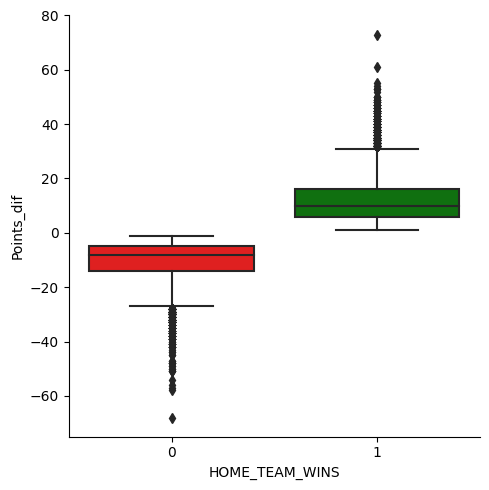

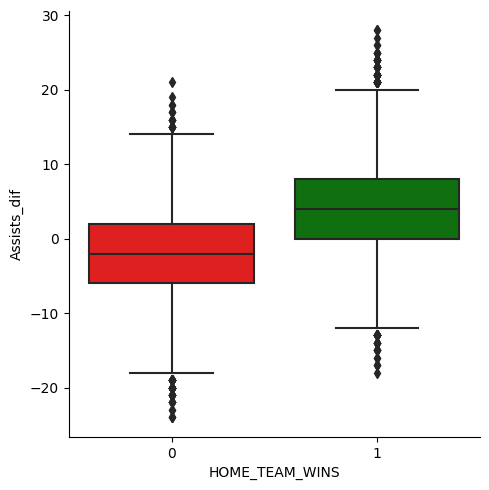

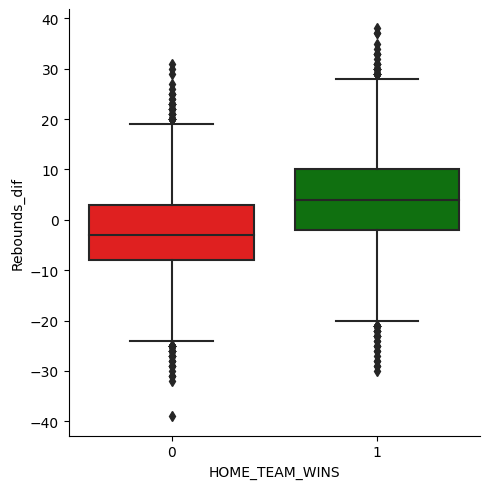

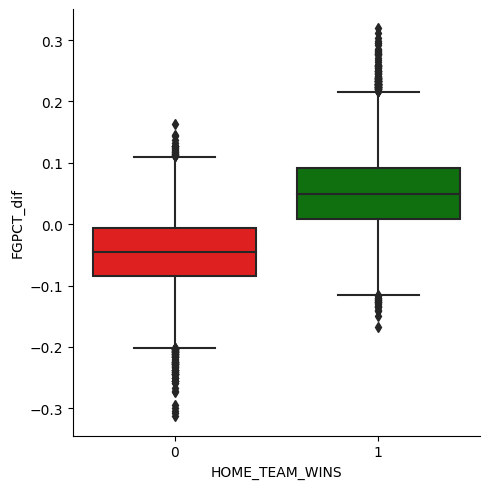

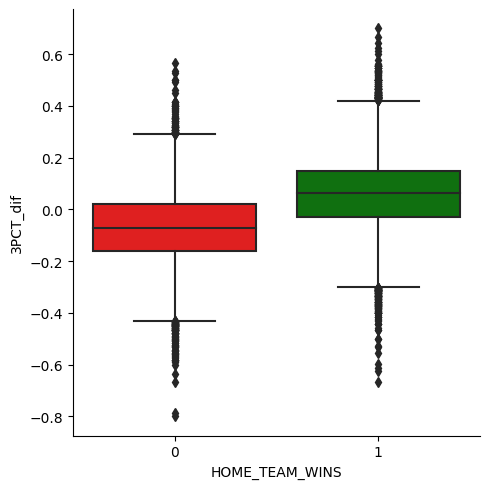

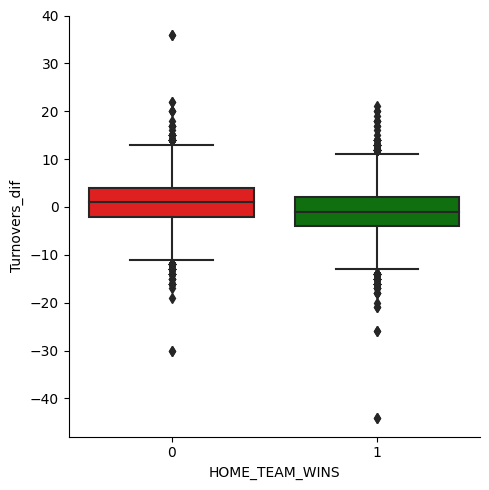

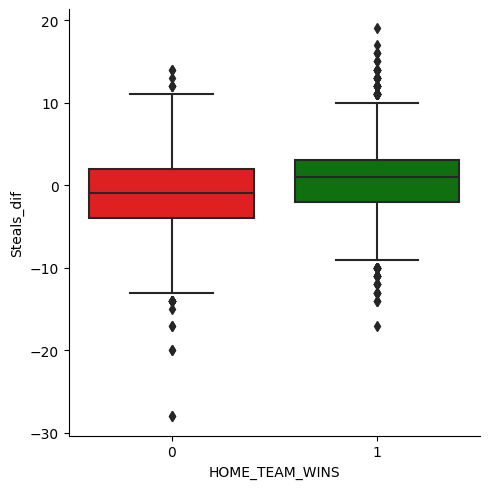

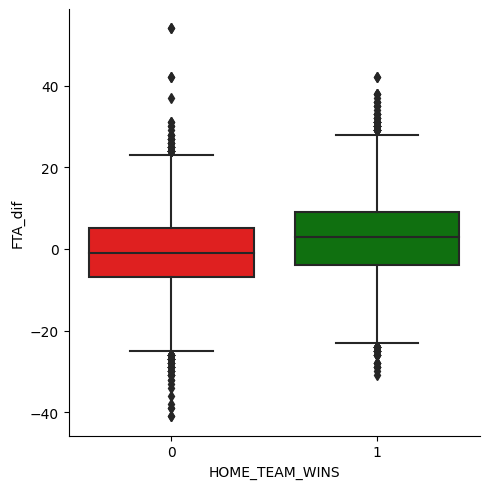

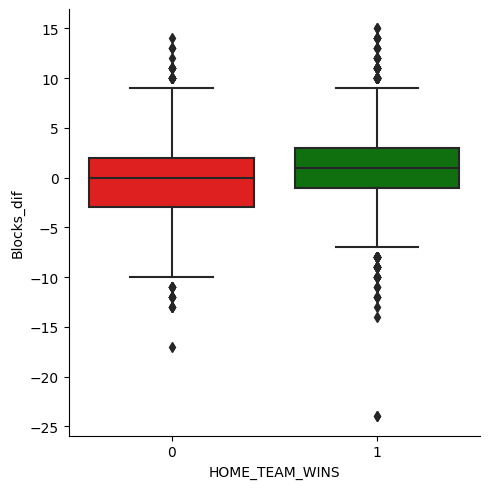

In [13]:
#Choose features of the dataset that could be important in determining the outcome of the game
features = ["Points_dif", "Assists_dif", "Rebounds_dif", "FGPCT_dif", "3PCT_dif", 'Turnovers_dif', 'Steals_dif', 'FTA_dif', 'Blocks_dif']
#Find the correlation coefficient and p-values of these features in regards to our target variable 'HOME_TEAM_WINS'
for item in features:
    correlation_coefficient, p_value = pearsonr(df_games[item].astype(float), df_games['HOME_TEAM_WINS'])
    print(item)
    print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
    print(f"P-value: {p_value}")

#Creat a box plot showing the impact the different features have on the target variable
sns.catplot(x = 'HOME_TEAM_WINS', y = 'Points_dif', data = df_games,  kind='box',  palette={0: 'red', 1: 'green'})
sns.catplot(x = 'HOME_TEAM_WINS', y = 'Assists_dif', data = df_games,  kind='box',  palette={0: 'red', 1: 'green'})
sns.catplot(x = 'HOME_TEAM_WINS', y = 'Rebounds_dif', data = df_games,  kind='box',  palette={0: 'red', 1: 'green'})
sns.catplot(x = 'HOME_TEAM_WINS', y = 'FGPCT_dif', data = df_games,  kind='box',  palette={0: 'red', 1: 'green'})
sns.catplot(x = 'HOME_TEAM_WINS', y = '3PCT_dif', data = df_games,  kind='box',  palette={0: 'red', 1: 'green'})
sns.catplot(x = 'HOME_TEAM_WINS', y = 'Turnovers_dif', data = df_games, kind='box', palette={0: 'red', 1: 'green'})
sns.catplot(x = 'HOME_TEAM_WINS', y = 'Steals_dif', data = df_games, kind='box', palette={0: 'red', 1: 'green'})
sns.catplot(x = 'HOME_TEAM_WINS', y = 'FTA_dif', data = df_games, kind='box', palette={0: 'red', 1: 'green'})
sns.catplot(x = 'HOME_TEAM_WINS', y = 'Blocks_dif', data = df_games, kind='box', palette={0: 'red', 1: 'green'})

After visualizing the different potential features we ended up deciding on the following:
["Assists_dif", "Rebounds_dif", "3PCT_dif", "Turnovers_dif", "Steals_dif", "FTA_dif", "Blocks_dif"]

We chose to not include the Field Goal percentage difference into the model because we thought it was too closely realted to points differential which is directly related to the outcome of the game.

# Classification Model
After selecting the features, we moved on to adding those features to the logistic regression model. Using the sklearn library, we can effectively use the features we calculated and divide the dataset into testing and training folds, where the model is then trained and finally introduced to the holdout set where we can see how accurate the model really is.

In [14]:
#Create a logistic regression model based on the features we evaluated earlier
features = ["Assists_dif", "Rebounds_dif", "3PCT_dif", "Turnovers_dif", "Steals_dif", "FTA_dif", "Blocks_dif"]

# Set features to X and target to Y
X = df_games[features]
y = df_games['HOME_TEAM_WINS']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

#Normalize feature values to get a better understanding of feature importance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 1, 1])

Accuracy: 0.8625494257202033
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      2166
           1       0.88      0.89      0.88      3145

    accuracy                           0.86      5311
   macro avg       0.86      0.86      0.86      5311
weighted avg       0.86      0.86      0.86      5311



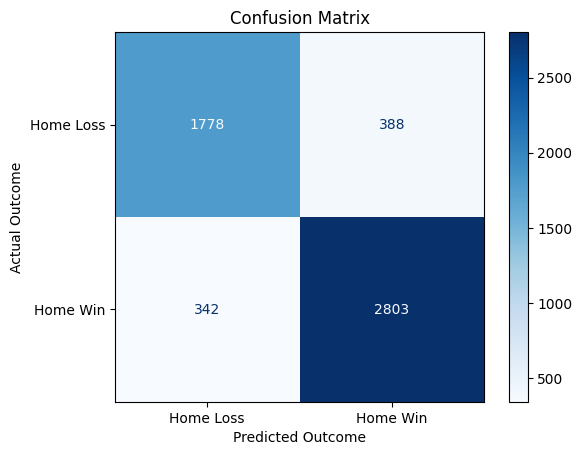

In [15]:
# Evaluate the model

#Calculate different accuracy and classification metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

#Create a confusion matrix showing how accurate our model was at correctly determining the outcome
categories = ['Home Loss', 'Home Win']
conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=categories)
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Outcome')
plt.ylabel('Actual Outcome')
plt.show()

From the evaluation of the model we see that the model is accurate 86% of the time.

Accuracy: (TP + TN) / (TP + TN + FP + FN) = 0.86
This means that 86% of the total predictions on the outcome of the game were correct.
Precision: TP / (TP + FP)
1: 0.88
This means that 88% of all records predicted as a win for the outcome of the game were actually a win.

These numbers are a good indicator on how effetive the model is and because the accuracy of the model is very good, we can implement use the model to see how an average Trailblazers team should perform.

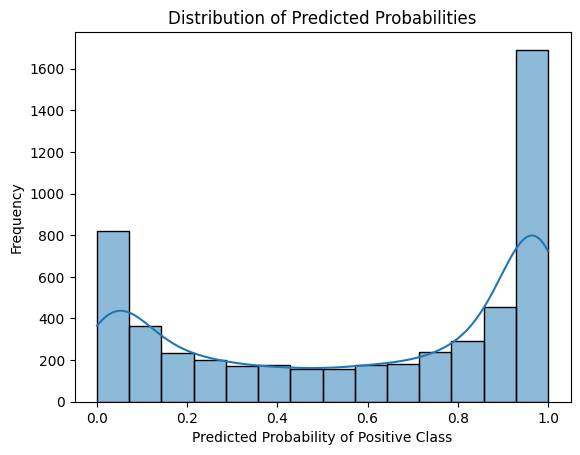

In [16]:
#Calculate the probabilities of each outcome rather than classification
predicted_probabilities = logreg.predict_proba(X_test)
#Visualize the distribution of predicted probabilities
sns.histplot(predicted_probabilities[:, 1], kde=True)
plt.xlabel('Predicted Probability of Positive Class')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.show()

This graph gives us a better understanding of how confident the model is in its predicitons. Instead of predicting whether the outcome of the game will be a win or a loss, we use the model to predict the probability of a game being a win or a loss. As you can see in the graph, more often than not the model is very confident on the outcome of the game, predicting with strong likelihood (90% or higher or 10% and lower) the outcome of the game.

# How successful are the TrailBlazers?

Now that our model has been built, we want to test it on the Portland Trailblazers to see how good they are. Using the average statistics of the team that we calculated earlier, we can effectively measure in a typical season, how well the team will perform.

Points: 101.60057142857143
Fieldgoal Percentage: 0.4522291428571431
FreeThrow Percentage: 0.774950285714286
3-Point Percentage: 0.35936628571428497
Assists: 20.928571428571427
Rebounds: 42.72571428571428
Turnovers: 13.50457142857143
Steals: 6.8748571428571426
FreeThrowAttempts: 22.972571428571428
Blocks: 4.908

Based on historical NBA games how often should the Portland Trailblazers win:
0.5417429584323503


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


<Axes: ylabel='Feature'>

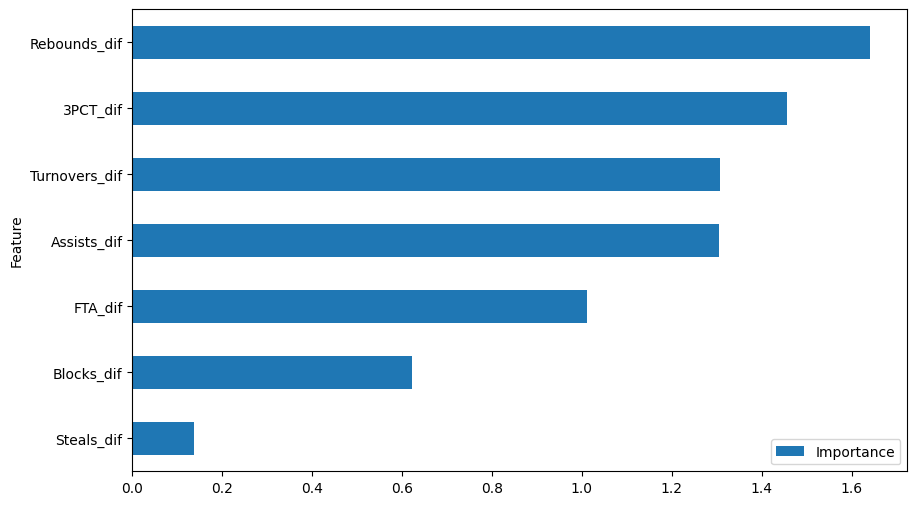

In [17]:
#Using our function to retreive average stats and using our logistic regression to predict how the Trailblazers would perform
df_TB_games = df_games.copy()
df_TB_games = df_TB_games[df_TB_games['VISITOR_TEAM_ID'] != 1610612757]

#Get the average stats for the Trailblazers
TB_stats = average_stats(df_TB_All)

#Re-calculate our features based on our average stats
df_TB_games["Assists_dif"] = TB_stats[4] - df_TB_games['AST_away']
df_TB_games["Rebounds_dif"] = TB_stats[5] - df_TB_games['REB_away']
df_TB_games["FGPCT_dif"] = TB_stats[1] - df_TB_games['FG_PCT_away']
df_TB_games["3PCT_dif"] = TB_stats[3] - df_TB_games['FG3_PCT_away']
df_TB_games["Turnovers_dif"] = TB_stats[6] - df_TB_games['AwayTeamTurnovers']
df_TB_games["Steals_dif"] = TB_stats[7] - df_TB_games['AwayTeamSteals']
df_TB_games["FTA_dif"] = TB_stats[8] - df_TB_games['AwayTeamFreeThrowAttempts']
df_TB_games["Blocks_dif"] = TB_stats[9] - df_TB_games['AwayTeamBlocks']

PT_features = ['Assists_dif', 'Rebounds_dif', '3PCT_dif', 'Turnovers_dif', 'Steals_dif', 'FTA_dif', 'Blocks_dif']

# Extract the selected features for prediction from the Portland Trail Blazers' stats
portland_features = df_TB_games[PT_features]

# Make predictions using the logistic regression model
predictions = logreg.predict(portland_features)

# Display the predictions
print("Based on historical NBA games how often should the Portland Trailblazers win:")
print(predictions.mean())

# Assuming 'logreg' is your trained logistic regression model
coefficients = logreg.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

# Results
From our results, we can see that based on average Portland Trailblazer statistics we predict the Portland Trailblazers will win 54% of their games.

This number was found by imputing the home teams statistics with the Trailblazer's average statistics and then running the logistic regression model again to see if they would be if they would be predicted to beat the visiting team.

Furthermore, we can see that Rebound differential, 3-Point Percentage, and Turnover differential are the three most influential factors in determining the outcome of a game.

Additionally, Free throw attempts, Blocks differntial, and Steals differential were the three least influential factors in determining the outcome of a game.

Using this knowledge, we would suggest that the Trailblazers work on boxing out in practice and shooting a more efficient 3-point shot. During the 2023 season so far, the Trailblazers are ranked 23 out of 30 teams in rebounds per game and 30 out of 30 teams in 3-point shooting percentage. Because those factors are the most influential in determining the outcome of the game, it is important that they work on getting in the top 10 teams for both of these statistics.

If the Trailblazers increased their rebounds per game by just 2 and their 3-point percentage by just 2%, their projected win rate would increase by 22%!

# Sources

- [2023 3-Point percentage](https://www.teamrankings.com/nba/stat/three-point-pct)
- [2023 Rebounds](https://www.teamrankings.com/nba/stat/total-rebounds-per-game)
- [NBA Games Dataset](https://www.kaggle.com/datasets/nathanlauga/nba-games)

# Made By: Alex Reid and Gerritt Pekkala